# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

<IPython.core.display.Javascript object>

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#! pip install pandas-profiling
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output_of census.html')

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
#Checking the Shape of the Data Set
df.shape

(32560, 15)

In [7]:
#Checking the Columns Name
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
#checking the Info of Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#checking the Data Types of all columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
#We have 2 types of datatypes Object and Int
#Lets Check the Nan Values
df.isnull().values.any()

False

<IPython.core.display.Javascript object>

<AxesSubplot:>

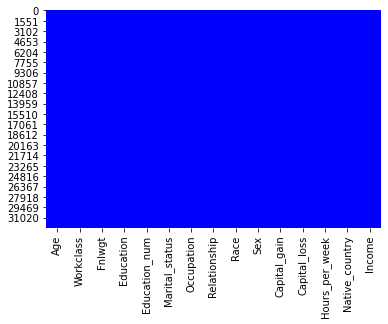

In [11]:
#From above result we can say that we  don't have any kind of nan values in this Data Set
#lets plot it on Heatmap 
sns.heatmap(df.isnull(),cmap='winter',cbar=False)

In [12]:
#lets Divided the data set into 2 types accoring to the Dtypes
df_numeric=df._get_numeric_data()
df_numeric_columns=df._get_numeric_data().columns
df_Catagorical=df.drop(columns=['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'],axis=1)

In [13]:
#lets do the EDA for the df_nuudf_numeric
df_numeric.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [14]:
df_Catagorical.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Result for →  Workclass
result start
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: Workclass, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

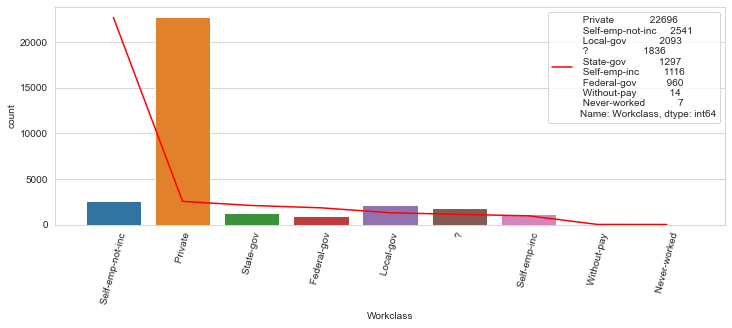

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Workclass
Result for →  Education
result start
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

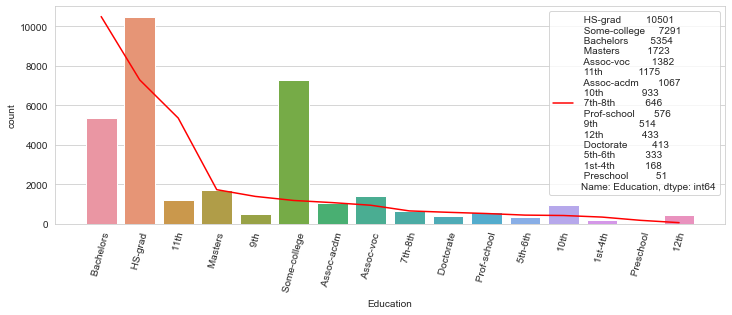

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Education
Result for →  Marital_status
result start
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name: Marital_status, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

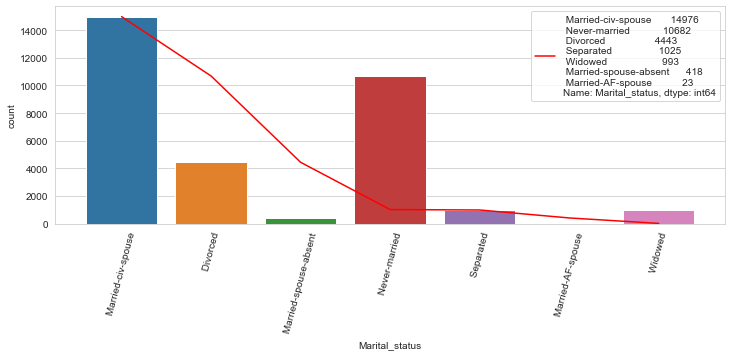

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Marital_status
Result for →  Occupation
result start
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 Prof-specialty       0.127150
 Craft-repair         0.125891
 Exec-managerial      0.124877
 Adm-clerical         0.115756
 Sales                0.112101
 Other-service        0.101198
 Machine-op-inspct    0.061486
 ?                    0.056603
 Transport-moving     0.049048
 Handlers-cleaners    0.042076
 Farming-fishing      0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

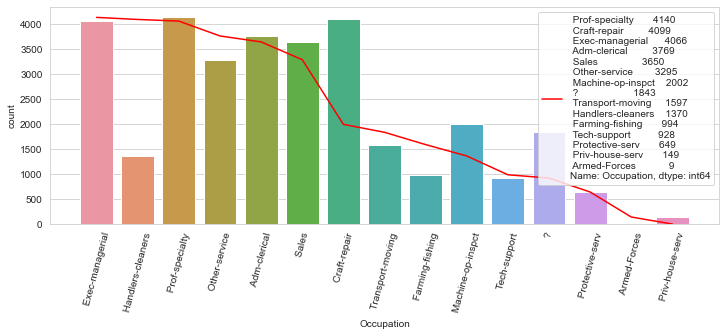

<IPython.core.display.Javascript object>

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Occupation
Result for →  Relationship
result start
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 Husband           0.405190
 Not-in-family     0.255037
 Own-child         0.155651
 Unmarried         0.105835
 Wife              0.048157
 Other-relative    0.030129
Name: Relationship, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

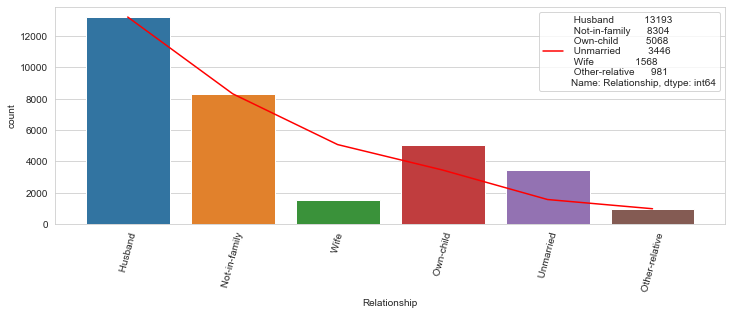

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Relationship
Result for →  Race
result start
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 White                 0.854269
 Black                 0.095946
 Asian-Pac-Islander    0.031910
 Amer-Indian-Eskimo    0.009552
 Other                 0.008323
Name: Race, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

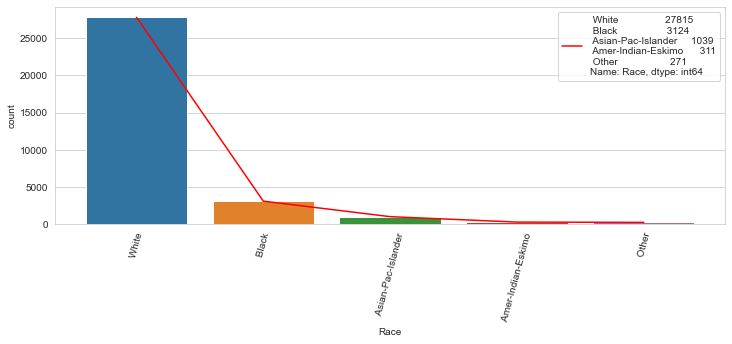

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Race
Result for →  Sex
result start
 Male      21789
 Female    10771
Name: Sex, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 Male      0.669195
 Female    0.330805
Name: Sex, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

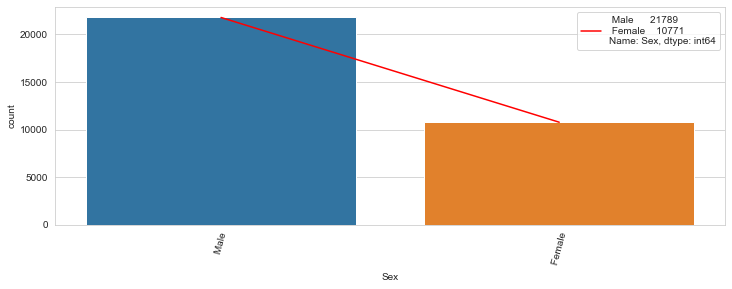

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Sex
Result for →  Native_country
result start
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

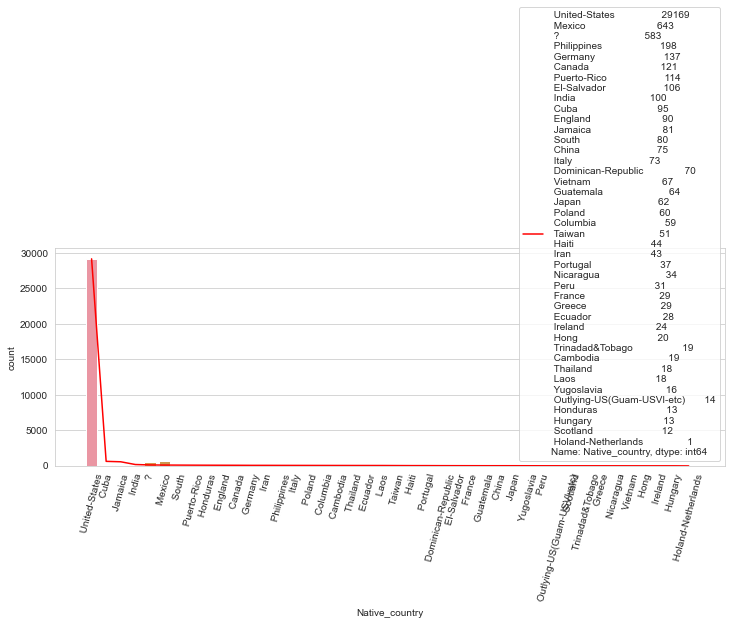

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Native_country
Result for →  Income
result start
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64
►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

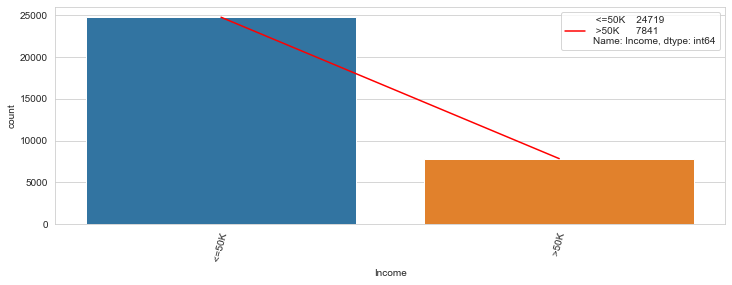

♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫


Result end  for →  Income


In [15]:
#lets Do the Value Counts with Count plot
for i in df_Catagorical.columns:
    val=df_Catagorical[i].value_counts()
    val_normalize=df_Catagorical[i].value_counts(normalize=True)
    print("Result for → ",i)
    print("result start")
    print(val)
    print('►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►')
    print(val_normalize)
    sns.set_style("whitegrid")
    plt.figure(figsize=[12,4])
    sns.countplot(x=df_Catagorical[i],data=df)
    plt.plot(val,color='red',label=val)
    plt.xlabel(i,)
    plt.xticks(rotation=75)
    plt.legend()
    plt.show()
    print("♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫♪♪♫")
    print("\n")
    print("Result end  for → ",i)
    

In [16]:
df.Income.value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

In [17]:
#From the Above Results We got to know that our Data Is Inbalanced we habe to balanced that one 
#lets do the Bai Variate Analysis for all catagorigal Data
df_Catagorical.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

# Workclass vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

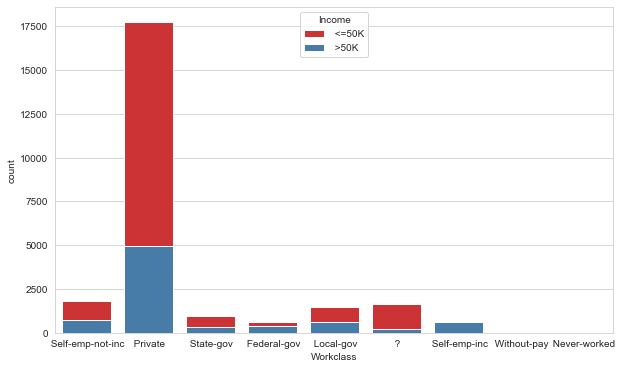

In [18]:
plt.figure(figsize=[10,6])
sns.countplot(x="Workclass",hue="Income",data=df,dodge=False,palette="Set1")
plt.show()

# Education vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

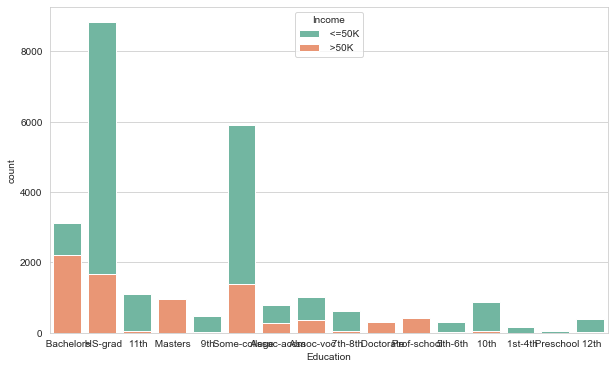

In [19]:
plt.figure(figsize=[10,6])
sns.countplot(x="Education",hue="Income",data=df,dodge=False,palette="Set2")
plt.show()

# Marital_status vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

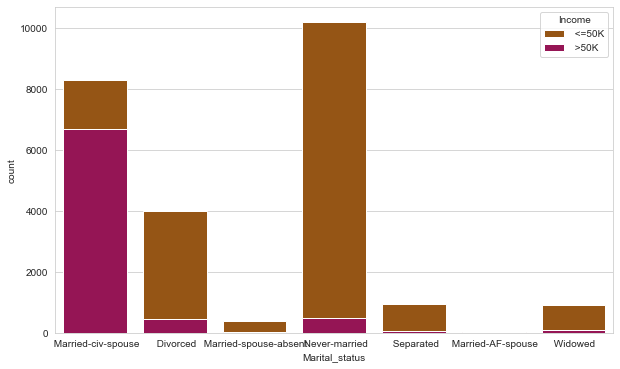

In [20]:
plt.figure(figsize=[10,6])
sns.countplot(x="Marital_status",hue="Income",data=df,dodge=False,palette="brg_r")
plt.show()

# Occupation Vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

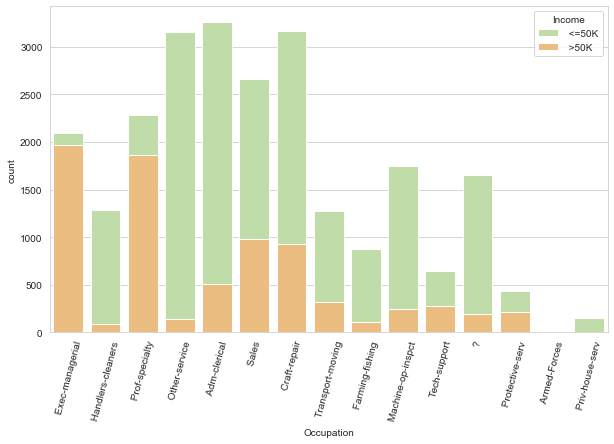

In [21]:
plt.figure(figsize=[10,6])
sns.countplot(x="Occupation",hue="Income",data=df,dodge=False,palette="Spectral_r")
plt.xticks(rotation=75)
plt.show()

# Relationship vs Income 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

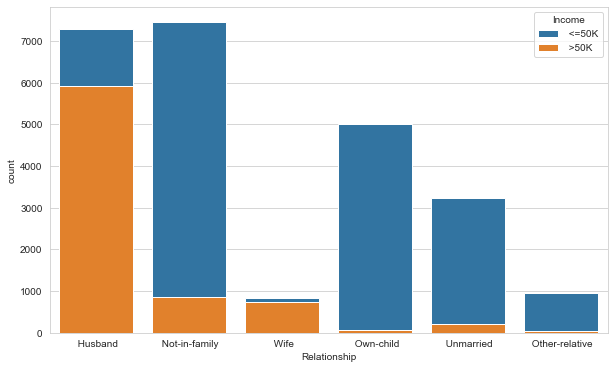

In [22]:
plt.figure(figsize=[10,6])
sns.countplot(x="Relationship",hue="Income",data=df,dodge=False)
plt.show()

# Race Vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

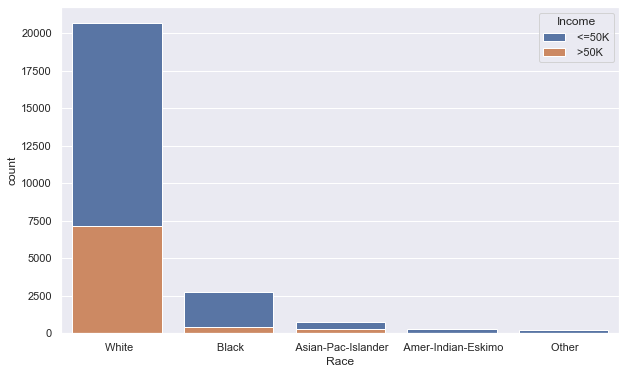

In [23]:
plt.figure(figsize=[10,6])
sns.set_theme(style="darkgrid")
sns.countplot(x="Race",hue="Income",data=df,dodge=False)
plt.show()

# Sex vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

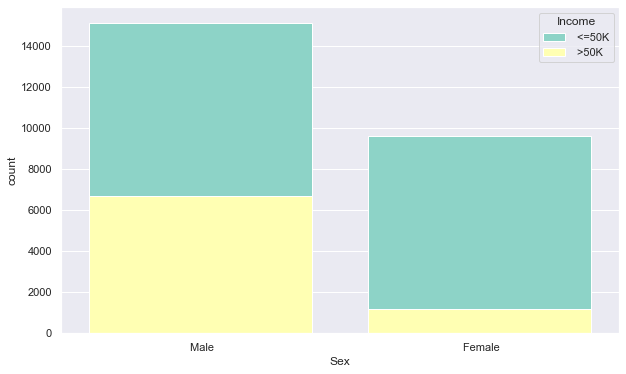

In [24]:
plt.figure(figsize=[10,6])
sns.countplot(x="Sex",hue="Income",data=df,dodge=False,saturation=10,palette="Set3")
plt.show()

# Native_country vs Income

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

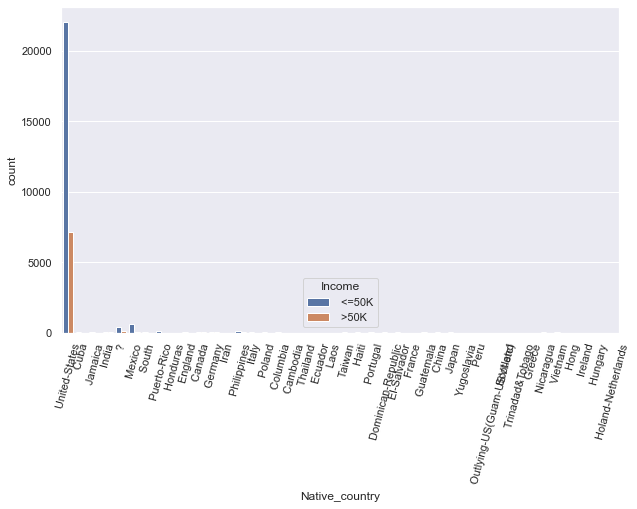

In [25]:
plt.figure(figsize=[10,6])
sns.countplot(x="Native_country",hue="Income",data=df)
plt.xticks(rotation=75)
plt.show()

# Numeric Data

In [26]:
df_numeric.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [27]:
dec=df.describe()

In [28]:
dec

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

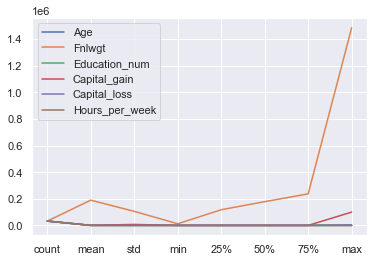

In [29]:
dec.plot(kind='line')

<IPython.core.display.Javascript object>

<AxesSubplot:>

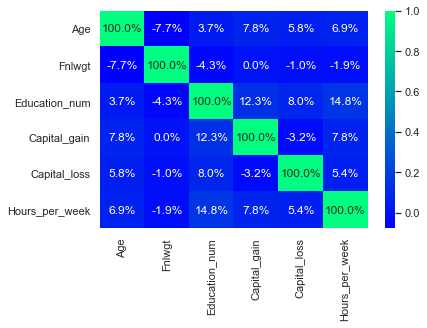

In [30]:
#correlation
sns.heatmap(df.corr(),annot=True,cmap='winter',fmt='.1%')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

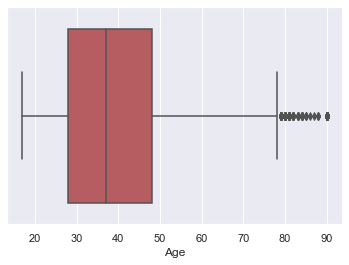

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

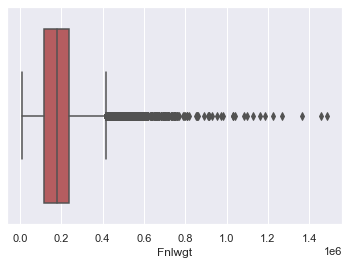

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

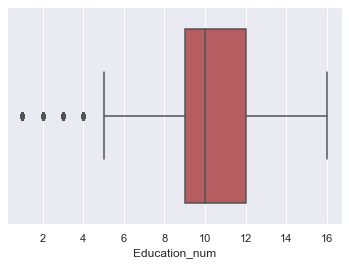

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

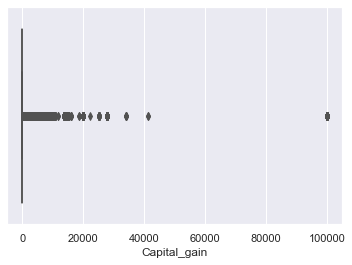

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

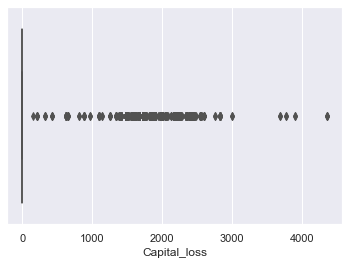

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

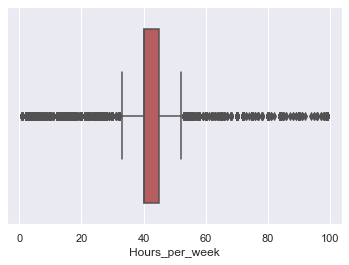

In [31]:
#We can find the Result from above graph that no  columns are not corelated with the others columns

#lets see for the Outliers

for i in df_numeric:
    col=df[i]
    sns.boxplot(col,color='r')
    plt.show()


In [32]:
#we can see that lots of  Outliers are present in the many columns


In [33]:
#Univariate analysis  for the Numeric data 
df_numeric.columns


Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

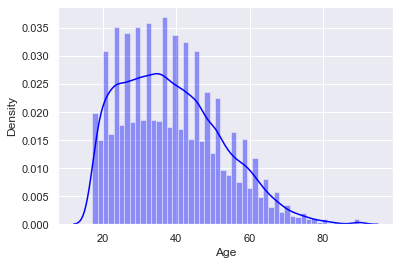

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

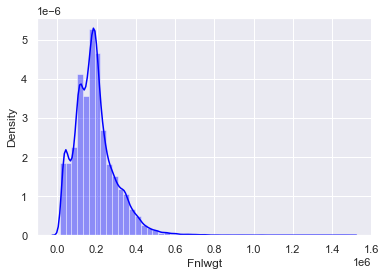

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

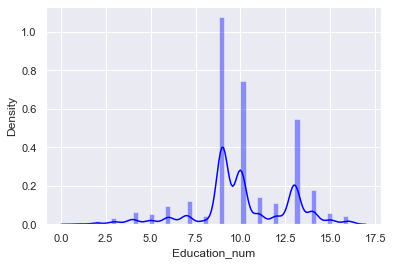

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

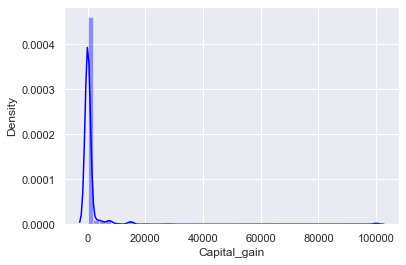

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

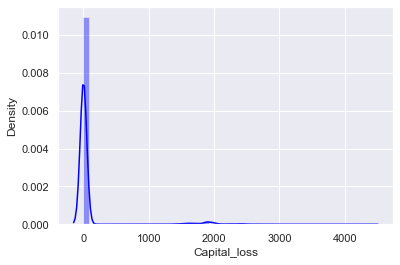

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

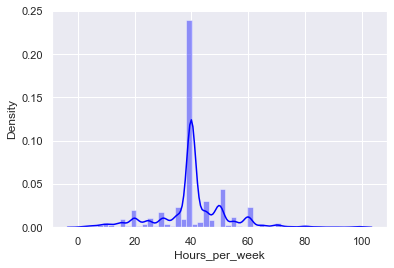

In [34]:
#Checking the Data Distribution
for i in df_numeric.columns:
    sns.distplot(df[i],color='blue',rug=False)
    plt.show()
#https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37

In [35]:
#checking the mean
def uni(col):
    df[col].hist()
    m=df[col].mean()
    plt.axvline(m,linewidth=4,color='green',label=('mean %0.2f'%m))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

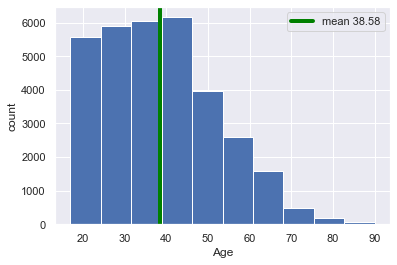

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

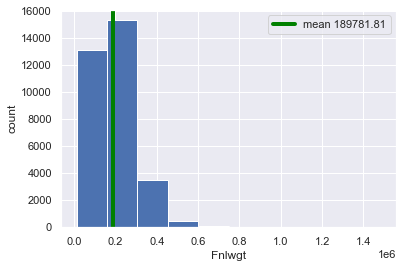

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

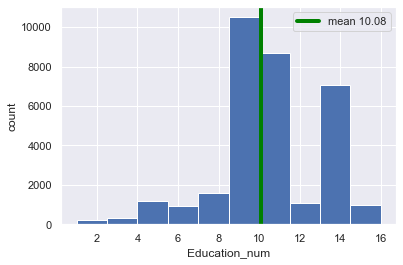

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

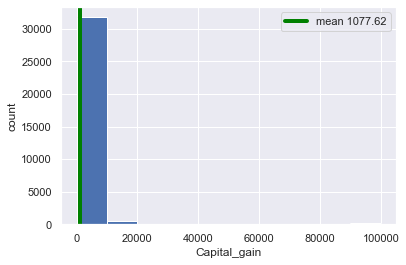

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

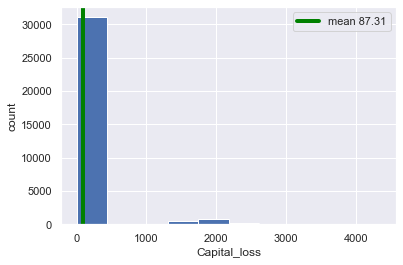

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

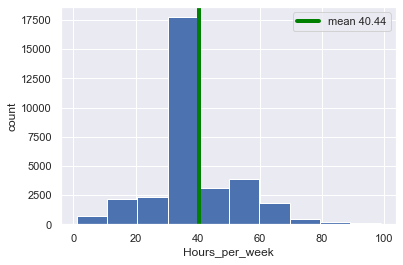

In [36]:
for i in df_numeric.columns:
    uni(i)

# Bai Variant Analysis

In [37]:
df_numeric.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

# Age Vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Income'>

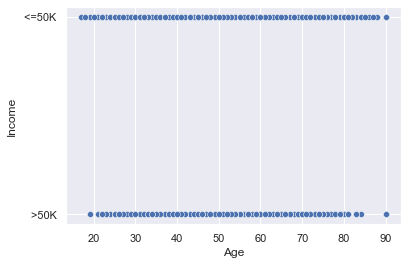

In [38]:
sns.scatterplot(x="Age",y="Income",data=df)

# Fnlwgt vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

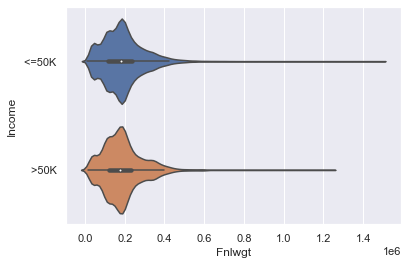

In [39]:
sns.violinplot(x="Fnlwgt",y="Income",data=df)

# Education_num vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

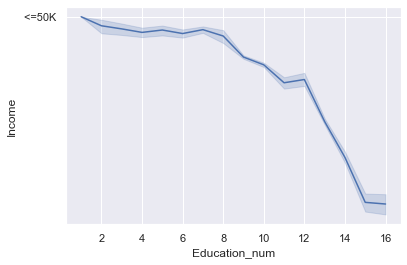

In [40]:
sns.lineplot(x="Education_num",y="Income",data=df)

# Capital_gain vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

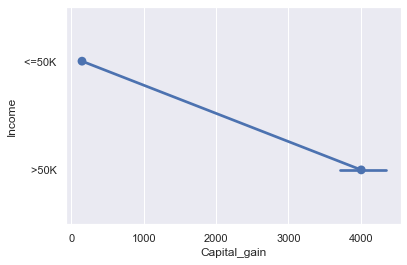

In [41]:
sns.pointplot(x="Capital_gain",y="Income",data=df)

# Capital_loss vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

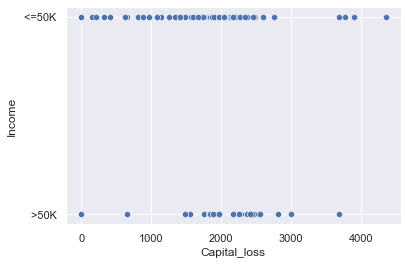

In [42]:
sns.scatterplot(x="Capital_loss",y="Income",data=df)

# Hours_per_week vs Income

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

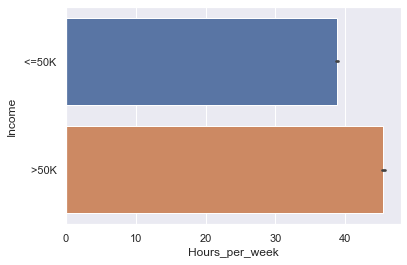

In [43]:
sns.barplot(x="Hours_per_week",y="Income",data=df)

<IPython.core.display.Javascript object>

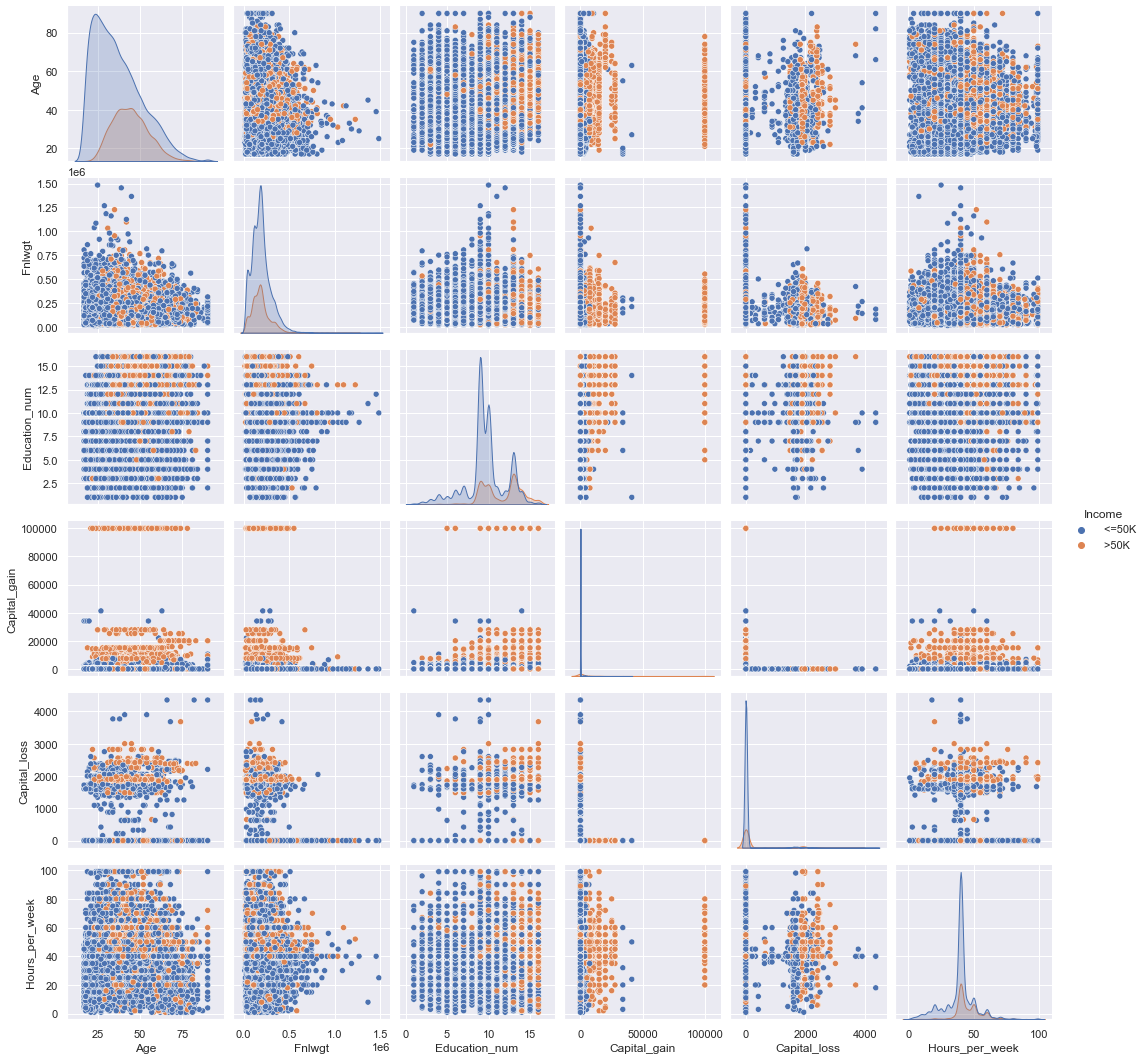

In [44]:
#pairplot
sns.pairplot(df,hue="Income")

# outlier ditection

<AxesSubplot:>

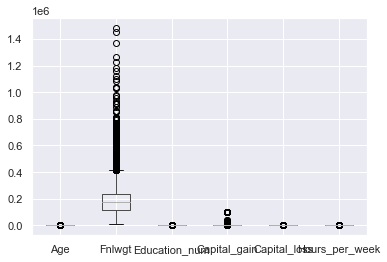

In [45]:
df.boxplot()

In [46]:
#Encoding
#objective to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=le.fit_transform(df[i])

In [47]:
#Outliers Remove
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

<IPython.core.display.Javascript object>

In [48]:
#Checking the Shape Of new Dat Frame
print(df_new.shape,df.shape)

(27417, 15) (32560, 15)


In [49]:
# checking the Data loss

loss_=((len(df)-len(df_new))/len(df))*100
print(loss_)

15.795454545454547


In [50]:
#we can see above Result that we loss more  data .
#so we are going to perform the Hypertuning

Q1=df.quantile(0.010)
Q3=df.quantile(0.99)
IQR=Q3-Q1
df_new_final=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new_final))/len(df))*100
print(df_new_final.shape,df.shape)
print("Data Loss % is →→",loss_)

(32395, 15) (32560, 15)
Data Loss % is →→ 0.5067567567567568


In [51]:
#lets split the Data set
x=df_new_final.drop(("Income"),axis=1)

In [52]:
y=df_new_final[["Income"]]

In [53]:
# checking the Shape of the x and y
print("X shape →→",x.shape,"\n","Y shape→→",y.shape)

X shape →→ (32395, 14) 
 Y shape→→ (32395, 1)


In [54]:
#lets handel the skew ness of our data
x.skew()

Age               0.562949
Workclass        -0.750099
Fnlwgt            1.298658
Education        -0.931689
Education_num    -0.316496
Marital_status   -0.017514
Occupation        0.117305
Relationship      0.781892
Race             -2.434436
Sex              -0.714717
Capital_gain      5.726696
Capital_loss      4.581286
Hours_per_week    0.226537
Native_country   -3.659734
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

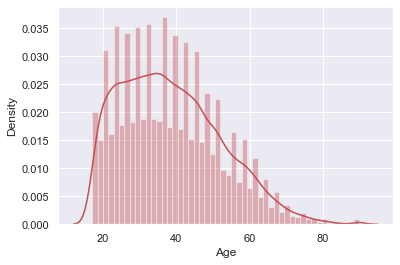

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

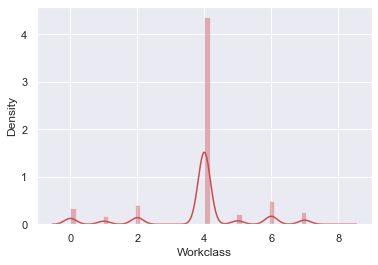

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

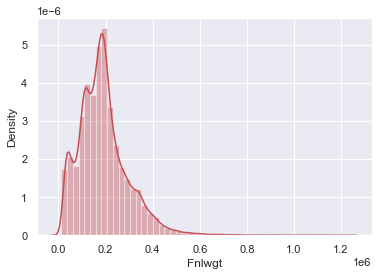

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

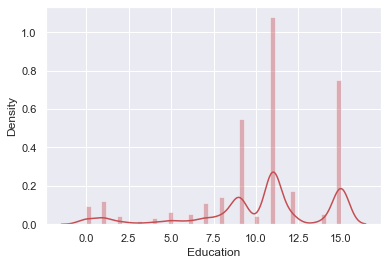

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

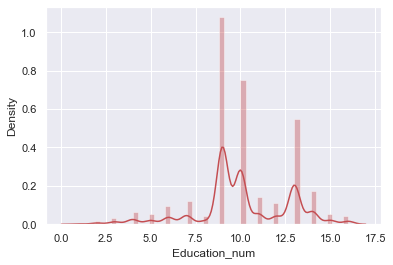

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

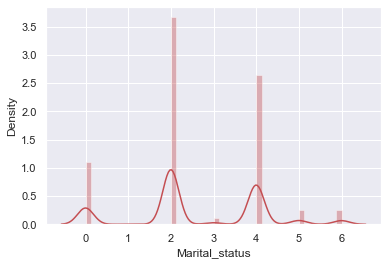

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

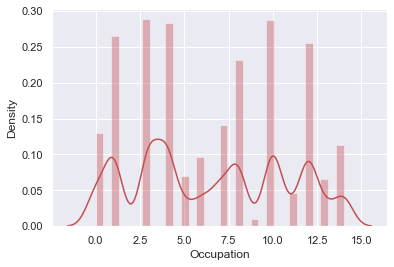

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

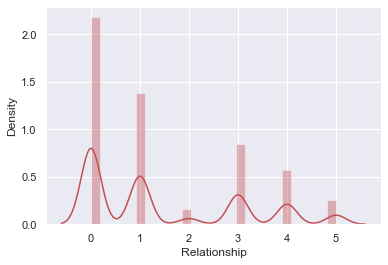

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

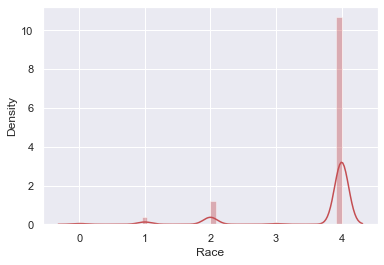

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

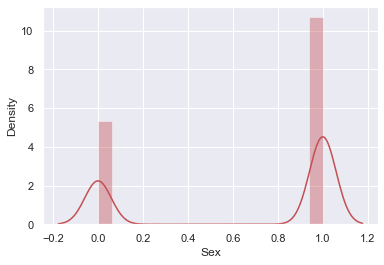

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

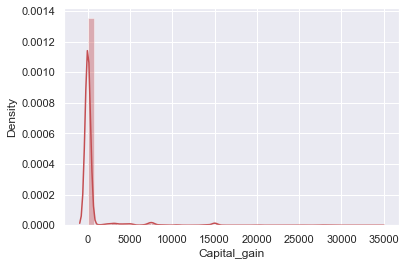

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

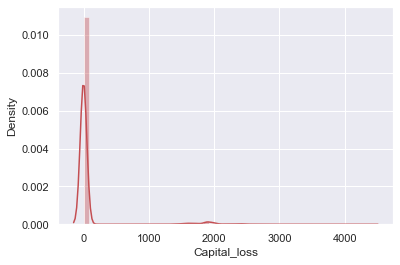

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

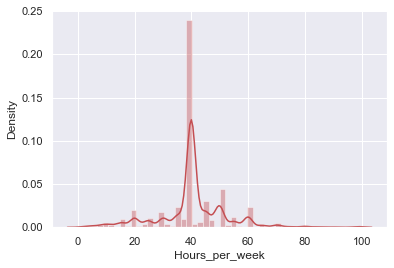

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

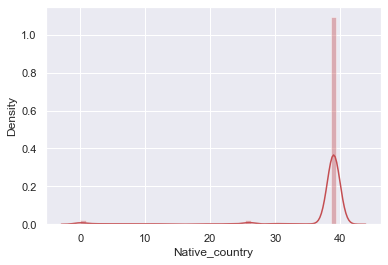

In [55]:
for i in x.columns:
    sns.distplot(x[i],color='r')
    plt.show()

In [58]:
x1=x.drop(columns=['Capital_gain', 'Capital_loss','Relationship'],axis=1)
from scipy import stats
for i in x1.columns:
    col=x[i].skew()
    lower=(-0.55)
    highest=0.55
    if col > highest:
        x[i]=np.log(x[i])
    if col  < lower:
        x[i]=np.sqrt(x[i])
x['Capital_gain']=np.sqrt(x['Capital_gain'])
x['Capital_loss']=np.sqrt(x['Capital_loss'])
x['Relationship']=np.sqrt(x['Relationship'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
x.skew()

Age              -0.127752
Workclass        -3.656297
Fnlwgt           -0.976202
Education        -4.668213
Education_num    -0.316496
Marital_status   -0.017514
Occupation        0.117305
Relationship      0.145198
Race             -8.346239
Sex              -0.714717
Capital_gain      3.331087
Capital_loss      4.363492
Hours_per_week    0.226537
Native_country   -6.563348
dtype: float64

In [60]:
#Data Balancing
y.value_counts()

Income
0         24713
1          7682
dtype: int64

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Income
0         24713
1         24713
dtype: int64

In [78]:
print(X_sm.shape, y_sm.shape)

(49426, 14) (49426, 1)


In [63]:
#Data Scalling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X_sm)
x=pd.DataFrame(x,columns=X_sm.columns)

<IPython.core.display.Javascript object>

In [79]:
x.shape

(49426, 5)

In [69]:
#Pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(x.columns))
cover_matrix.fit(x)

PCA(n_components=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

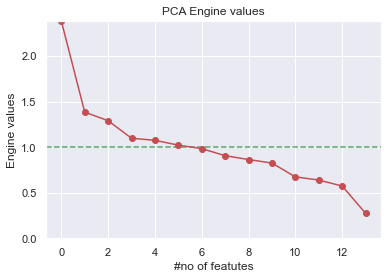

In [72]:
plt.ylabel("Engine values")
plt.xlabel("#no of featutes")
plt.title("PCA Engine values")
plt.ylim(0,max(cover_matrix.explained_variance_))
plt.axhline(y=1,color='g',linestyle='--')
plt.plot(cover_matrix.explained_variance_,'ro-')
plt.show()

In [73]:
pca=PCA(n_components=5)
x1=pca.fit_transform(x)
x=pd.DataFrame(x1)


<IPython.core.display.Javascript object>

In [76]:
x.shape

(49426, 5)

In [80]:
y=y_sm
y.shape

(49426, 1)

# ModelCreation 

In [83]:
#In this data set we know that out target variable Default is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
final_accuracy=[]
final_random=[]
clf=[]
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=accuracy_score(y_test,y_prd)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    final_accuracy.append(max_acc)
    final_random.append(final_r)
    clf.append(rgr)
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [84]:
from sklearn.linear_model import LogisticRegression
clf_lg=LogisticRegression()
max_acc(clf_lg,x,y)

max accuracy_ score coressponding to ♣♣→ 85 is♣♣ 78.45437993121585


In [100]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
cvs=[]
def Cross_validity(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())
    cvs.append(c.mean())

In [101]:
Cross_validity(clf_lg,x,y)

mean accuracy score for  LogisticRegression() 0.7733785099553216
Standard deviation  in accuracy score for  LogisticRegression() 0.0048304983867897685

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.7733785099553216


In [103]:
#lets make a function for confusion matrix and classification report 
def clasifier(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    cm=confusion_matrix(y_test,pre)
    sns.heatmap(cm,annot=True,cmap='rainbow',cbar=False)
    print()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    plt.figure(figsize=[20,50],facecolor='green')
    plt.subplot(912)
    plt.title(md,{"fontsize":22})
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

0.7777665385393486
roc_auc_score =  0.7782187332180702


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

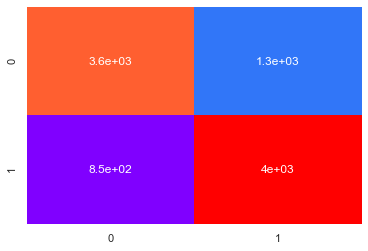

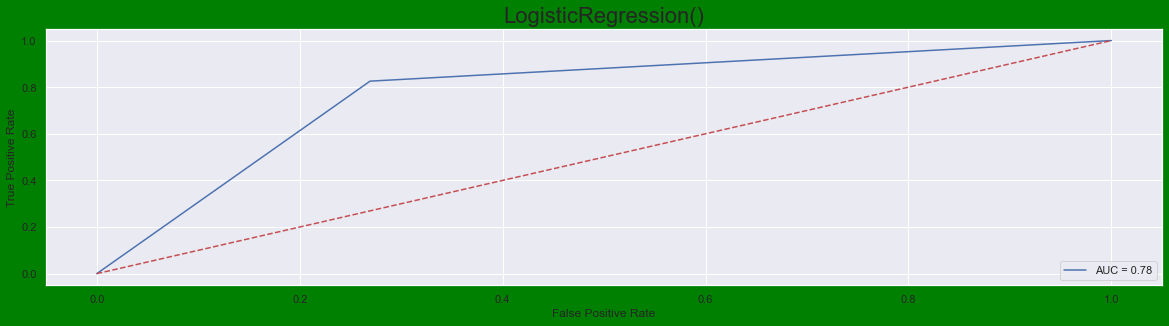

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      4990
           1       0.75      0.83      0.79      4896

    accuracy                           0.78      9886
   macro avg       0.78      0.78      0.78      9886
weighted avg       0.78      0.78      0.78      9886
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [104]:
clasifier(clf_lg,x,y,85)

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
params={"n_neighbors":range(1,40,2)}
grd_kn=GridSearchCV(kn,params,cv=10,scoring='accuracy')
grd_kn.fit(x,y)
grd_kn.best_params_


{'n_neighbors': 3}

In [110]:
knn=KNeighborsClassifier(n_neighbors=3)
max_acc(knn,x,y)

max accuracy_ score coressponding to ♣♣→ 83 is♣♣ 82.16670038438195


In [112]:
Cross_validity(knn,x,y)

mean accuracy score for  KNeighborsClassifier(n_neighbors=3) 0.8157246898916745
Standard deviation  in accuracy score for  KNeighborsClassifier(n_neighbors=3) 0.009354925636690721

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_neighbors=3) the accuracy score mean is 0.8157246898916745


0.8163058871130893
roc_auc_score =  0.8167446840908309


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

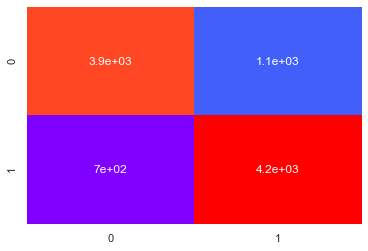

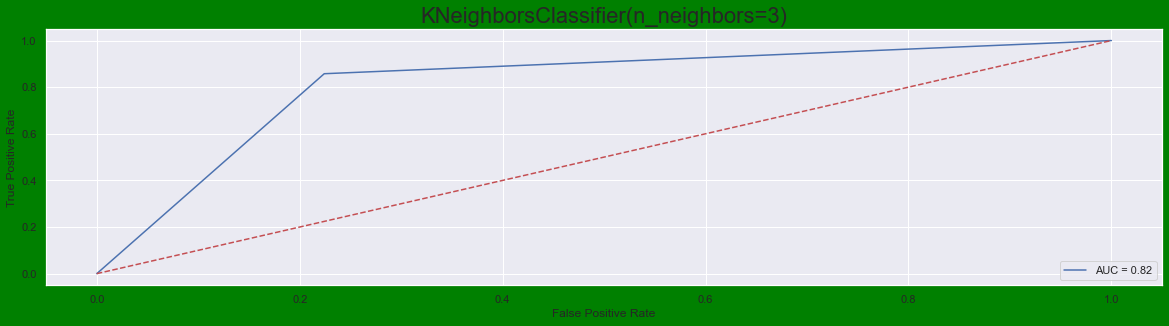

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4996
           1       0.79      0.86      0.82      4890

    accuracy                           0.82      9886
   macro avg       0.82      0.82      0.82      9886
weighted avg       0.82      0.82      0.82      9886
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [113]:
clasifier(knn,x,y,83)

In [127]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
params={'n_estimators':range(100,200,1000),'criterion':['gini','entropy'],"max_features":['auto','sqrt','log2']}
gr_sc=GridSearchCV(rfc,params,cv=10,scoring='accuracy')
gr_sc.fit(x,y)
#svc.get_params().keys()
gr_sc.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

In [128]:
clf_rfc=RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=100)
max_acc(clf_rfc,x,y)

max accuracy_ score coressponding to ♣♣→ 74 is♣♣ 84.39206959336435


In [129]:
Cross_validity(clf_rfc,x,y)

mean accuracy score for  RandomForestClassifier(criterion='entropy', max_features='log2') 0.8346824430782032
Standard deviation  in accuracy score for  RandomForestClassifier(criterion='entropy', max_features='log2') 0.008681856202215928

******************************************************
After seen the cross validation score of RandomForestClassifier(criterion='entropy', max_features='log2') the accuracy score mean is 0.8346824430782032


0.8309730932632005
roc_auc_score =  0.8312329839054252


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

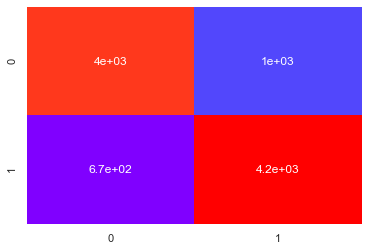

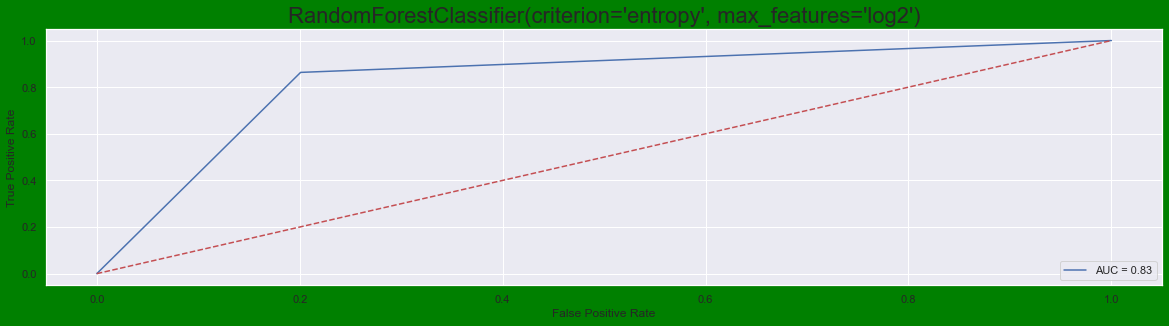

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4983
           1       0.81      0.86      0.84      4903

    accuracy                           0.83      9886
   macro avg       0.83      0.83      0.83      9886
weighted avg       0.83      0.83      0.83      9886
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [130]:
clasifier(clf_rfc,x,y,74)

In [134]:
#from above Result we  found that Random Forest Classifier is working fine 
#so we are finalize the Randomforest Classifier 

[0.7733785099553216, 0.8157246898916745, 0.8346824430782032]

In [135]:
#Making pipeline 
from sklearn.pipeline import Pipeline
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=0.20,stratify=y)

In [152]:
#making a function for PCA
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA
class pca(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,documents,y=None):
        return self
    def transform(self,x_dataset):
        pca=PCA(n_components=5)
        x1=pca.fit_transform(x_dataset)
        x=pd.DataFrame(x1)
        return x
        

In [153]:
sc=StandardScaler()

In [154]:
pipe = Pipeline([('scaler', StandardScaler()),('PCA',pca()),('RFC', RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=100))])

In [155]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', pca()),
                ('RFC',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='log2'))])

In [156]:
pipe_final=pipe.fit(x_train,y_train)

<IPython.core.display.Javascript object>

In [159]:
pipe_final.predict(x_test)

<IPython.core.display.Javascript object>

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
#lets Save the Model
import joblib
joblib.dump(pipe_final,"census_income.pkl")

['census_income.pkl']

In [161]:
#saving as csv also 
joblib.dump(pipe_final,"census_income.csv")

['census_income.csv']

In [164]:
#lets chk our model
model=joblib.load('census_income.pkl')
model.predict(x_test[:5])

<IPython.core.display.Javascript object>

array([0, 1, 0, 0, 0])

# Thank You